In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Sanford Jone\Downloads\IOT-temp.csv")

In [5]:
df

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [7]:
df.drop(["room_id/id"], axis = 1, inplace = True) 

In [8]:
df

,id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,08-12-2018 09:29,31,In
...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,28-07-2018 07:06,31,In


In [9]:
df['noted_date']=pd.to_datetime(df['noted_date'])
df_new=df.set_index('noted_date')

In [10]:
df

,id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,2018-08-12 09:30:00,29,In
1,__export__.temp_log_196131_7bca51bc,2018-08-12 09:30:00,29,In
2,__export__.temp_log_196127_522915e3,2018-08-12 09:29:00,41,Out
3,__export__.temp_log_196128_be0919cf,2018-08-12 09:29:00,41,Out
4,__export__.temp_log_196126_d30b72fb,2018-08-12 09:29:00,31,In
...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,2018-07-28 07:07:00,31,In
97602,__export__.temp_log_147733_62c03f31,2018-07-28 07:07:00,31,In
97603,__export__.temp_log_100386_84093a68,2018-07-28 07:06:00,31,In
97604,__export__.temp_log_123297_4d8e690b,2018-07-28 07:06:00,31,In


In [11]:
df_new1=df_new.groupby(df_new.index).mean()

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
df_new1_ss = scaler.fit_transform(df_new1)

In [14]:
from sklearn.preprocessing import minmax_scale
df_new1_mm = minmax_scale(df_new1)

Text(0, 0.5, 'temproture')

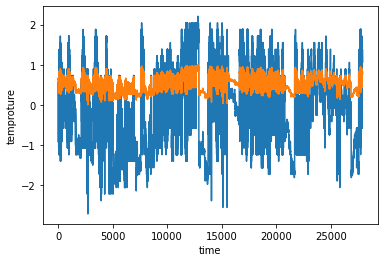

In [15]:
plt.plot(df_new1_ss)
plt.plot(df_new1_mm)
plt.xlabel('time')
plt.ylabel('temproture')

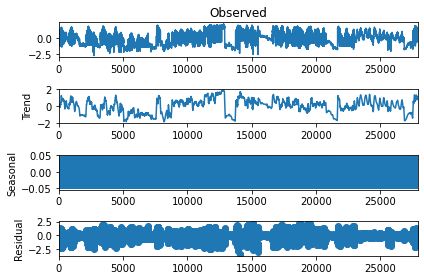

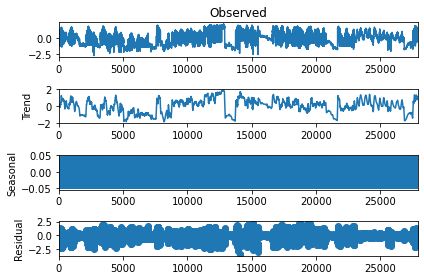

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_new1_ss, model='additive', period=52)
result.plot()

In [17]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
h=sm.tsa.arima.ARIMA(endog=df_new1_ss,order=(1,1,3))
model=h.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                27920
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -25921.069
Date:                Sun, 16 Apr 2023   AIC                          51852.139
Time:                        17:31:25   BIC                          51893.324
Sample:                             0   HQIC                         51865.399
                              - 27920                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1023      0.039     -2.629      0.009      -0.179      -0.026
ma.L1         -0.7370      0.039    -18.977      0.000      -0.813      -0.661
ma.L2         -0.0265      0.033     -0.802      0.422      -0.091       0.038
ma.L3         -0.0933      0.004    -26.359      0.000      -0.100      -0.086
sigma2         0.3749      0.002    171.191      0.000       0.371       0.379
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9831.97
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

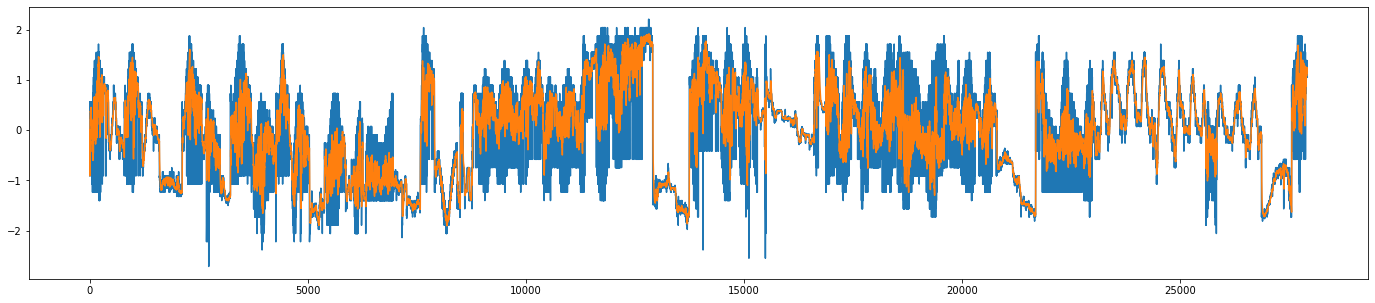

In [18]:
plt.figure(figsize=(24,5))
plt.plot(df_new1_ss)
plt.plot(model.predict())
plt.show()